In [1]:
import re
import pandas as pd
from google.colab import drive
import seaborn as sns

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/dataset/pashto_dataset.csv'
df = pd.read_csv(file_path)
df.head()


Mounted at /content/drive


,desc
0,له دې اعلان وروسته د دغه هېواد لر او بر لاریون...
1,د بریتانیا لسټر سیمې محکمې ټېک ټاکرې مهک بخاري...
2,د پاکستان د پوځ مشر وايي، چې هېواد به یې تر هغ...
3,د (هرډوز) کمپنۍ مشر محمد الفائد چې زوی یې (دود...
4,د طالبانو حکومت د کورنیو چارو وزارت کابل ښار ک...


In [3]:
df = df.dropna(subset=["desc"])
df = df.drop_duplicates(subset=["desc"])
df = df.reset_index(drop=True)
#df

In [4]:
df['length'] = df['desc'].apply(lambda row: len(row.split()))
print('Mean length: ', df['length'].mean())

Mean length:  123.61552716278163


<Axes: xlabel='length', ylabel='Count'>

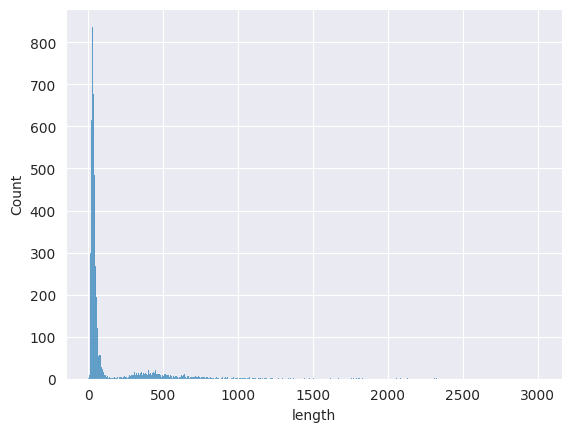

In [5]:
sns.set_style(style="darkgrid")
sns.histplot(df['length'])


In [6]:
# Clean text data
def cleantwt(twt):
    if isinstance(twt, str):
        twt = re.sub("RT", " ", twt)
        twt = re.sub("#[A-Za_z0-9]+", "", twt)
        twt = re.sub(r'[۰-۹]+', '', twt)
        twt = re.sub('[۰۱۲۳۴۵۶۷۸۹]+','',twt)
        twt = re.sub(r'[A-Za-z]', '', twt)
        twt = re.sub("''", "", twt)
        twt = re.sub("\\n", "", twt)
        twt = re.sub("https?:\/\/\S+", "", twt)
        twt = re.sub('@[\S]*', '', twt)
        twt = re.sub('^[\s]+|[\s]+$', '', twt)
        twt = re.sub(r'[$+&+;+]|[><!+،:,\(\).+،+٬+,+]|[-+]|[…]|[\[\]»«//]|[\\]|[#+]|[_+]|[٪+]|[%]|[*+]|[؟+]|[?+]|[""]|@', ' ',twt)
        return twt
    else:
        return twt

df["clean_text"] = df["desc"].apply(cleantwt)


<>:11: SyntaxWarning: invalid escape sequence '\/'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\/'
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3125773335.py:11: SyntaxWarning: invalid escape sequence '\/'
  twt = re.sub("https?:\/\/\S+", "", twt)
/tmp/ipython-input-3125773335.py:12: SyntaxWarning: invalid escape sequence '\S'
  twt = re.sub('@[\S]*', '', twt)
/tmp/ipython-input-3125773335.py:13: SyntaxWarning: invalid escape sequence '\s'
  twt = re.sub('^[\s]+|[\s]+$', '', twt)


In [7]:
df['clean_text'][1]

'د بریتانیا لسټر سیمې محکمې ټېک ټاکرې مهک بخاري او د هغې مور عنصرین بخاري ته د پلان له مخې د دوو ځوانانو وژلو له کبله د عمري زندان سزا ورکړې  د بریتانیا لسټر سیمې محکمې ټېک ټاکرې مهک بخاري او د هغې مور عنصرین بخاري ته د پلان له مخې د دوو ځوانانو وژلو له کبله د عمري زندان سزا ورکړې  محکمې په دې قضیه کې دوو نورو کسانو ریحان کاروان او رئیس جمال ته هم د عمري زندان او درې کسانو ته بیا د غیرعمدي قتل په تور سزا ورکړې  ټېک ټاکرې مهک بخاري ته ټولټال  کاله اته میاشتې او مور یې عنصرین بخاري په  کاله او نهه میاشتو زندان سزا محکومې شوې  د یادونې ده  چې رئیس جمال پر یوې نجلۍ د جنسي تېري جرم له کبله په  کال کې په لس کلن زندان سزا محکوم شوی او له هغه راهیسې په زندان کې دی  له نوې سزا سره به د نوموړي ټولټال سزا  کالو او  ورځو ته ورسېږي  ریحان کاروان ته بیا د  کاله بند سزا ورکړل شوې  په دې قضیه کې په غیرعمدي قتل تورن امیر جمال  کاله  نتاشا اختر  کاله او صناف ګل مصطفیٰ هم په  کاله بند محکوم شوي دي  د بي بي سي خبریالې ایملي اینډرسن د محکمې له ودانۍ په خپل استول شوي رپوټ کې وویل  مور او لور دواړو د محکمې پ

In [12]:

stopwords_path = '/content/drive/My Drive/Colab Notebooks/dataset/stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
    urdu_stopwords = set([word.strip() for word in f.read().splitlines() if word.strip()])

print(f'Total stopwords loaded: {len(urdu_stopwords)}')
def preprocess_urdu(text):
    text = cleantwt(text)
    words = [word for word in text.split() if word not in urdu_stopwords]
    return ' '.join(words)
df['processed_text'] = df['clean_text'].apply(preprocess_urdu)
df[['clean_text', 'processed_text']].head()


Total stopwords loaded: 816


,clean_text,processed_text
0,له دې اعلان وروسته د دغه هېواد لر او بر لاریون...,اعلان هېواد لر بر لاریونونه برېښنا بېلونه وسوځ...
1,د بریتانیا لسټر سیمې محکمې ټېک ټاکرې مهک بخاري...,بریتانیا لسټر محکمې ټېک ټاکرې مهک بخاري مور عن...
2,د پاکستان د پوځ مشر وايي چې هېواد به یې تر هغ...,پاکستان هېواد ترهګرۍ مبارزه ولس ټکو مصیبته وژغ...
3,د هرډوز کمپنۍ مشر محمد الفائد چې زوی یې دود...,هرډوز کمپنۍ محمد الفائد زوی دودي الفاید بریتان...
4,د طالبانو حکومت د کورنیو چارو وزارت کابل ښار ک...,طالبانو حکومت کورنیو وزارت کابل ښار امنیتي کام...
